In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

trades = pd.read_csv("trades.csv")

In [2]:
trades.shape

(8446, 15)

In [3]:
trades.drop_duplicates()
#Drop rows with Null Values
trades.dropna(axis=0, inplace=True)

In [4]:
trades.columns

Index(['transaction_date', 'owner', 'ticker', 'asset_description',
       'asset_type', 'type', 'amount', 'comment', 'party', 'state', 'industry',
       'sector', 'senator', 'ptr_link', 'disclosure_date'],
      dtype='object')

In [5]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5501 entries, 0 to 7642
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   transaction_date   5501 non-null   object
 1   owner              5501 non-null   object
 2   ticker             5501 non-null   object
 3   asset_description  5501 non-null   object
 4   asset_type         5501 non-null   object
 5   type               5501 non-null   object
 6   amount             5501 non-null   object
 7   comment            5501 non-null   object
 8   party              5501 non-null   object
 9   state              5501 non-null   object
 10  industry           5501 non-null   object
 11  sector             5501 non-null   object
 12  senator            5501 non-null   object
 13  ptr_link           5501 non-null   object
 14  disclosure_date    5501 non-null   object
dtypes: object(15)
memory usage: 687.6+ KB


In [6]:
trades.transaction_date = pd.to_datetime(trades.transaction_date)
trades.disclosure_date = pd.to_datetime(trades.disclosure_date)

In [7]:
trades

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,party,state,industry,sector,senator,ptr_link,disclosure_date
0,2023-04-18,Spouse,ESS,"Essex Property Trust, Inc. Common Stock",Stock,Sale (Full),"$1,001 - $15,000",--,Democrat,RI,Real Estate Investment Trusts,Consumer Services,Sheldon Whitehouse,https://efdsearch.senate.gov/search/view/ptr/9...,2023-05-17
1,2023-04-18,Self,ESS,"Essex Property Trust, Inc. Common Stock",Stock,Sale (Full),"$1,001 - $15,000",--,Democrat,RI,Real Estate Investment Trusts,Consumer Services,Sheldon Whitehouse,https://efdsearch.senate.gov/search/view/ptr/9...,2023-05-17
3,2023-04-04,Spouse,UPS,"United Parcel Service, Inc. Common Stock",Stock,Sale (Full),"$1,001 - $15,000",--,Republican,WV,Trucking Freight/Courier Services,Transportation,Shelley Moore Capito,https://efdsearch.senate.gov/search/view/ptr/6...,2023-05-15
4,2023-04-04,Spouse,MCD,McDonald's Corporation Common Stock,Stock,Sale (Partial),"$1,001 - $15,000",--,Republican,WV,Restaurants,Consumer Services,Shelley Moore Capito,https://efdsearch.senate.gov/search/view/ptr/6...,2023-05-15
5,2023-04-04,Spouse,DUK,Duke Energy Corporation (Holding Company) Comm...,Stock,Sale (Full),"$15,001 - $50,000",--,Republican,WV,Power Generation,Public Utilities,Shelley Moore Capito,https://efdsearch.senate.gov/search/view/ptr/6...,2023-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7627,2015-01-16,Self,NOG,"Northern Oil and Gas, Inc. (AMEX)",Stock,Purchase,"$15,001 - $50,000",--,Republican,ND,Oil & Gas Production,Energy,John Hoeven,https://efdsearch.senate.gov/search/view/ptr/1...,2015-01-21
7628,2015-01-06,Self,FCX,Freeport-McMoRan Inc. (NYSE),Stock,Sale (Full),"$50,001 - $100,000",--,Republican,ND,Precious Metals,Basic Industries,John Hoeven,https://efdsearch.senate.gov/search/view/ptr/6...,2015-01-20
7640,2014-12-12,Spouse,XOM,Exxon Mobil Corporation (NYSE),Stock,Sale (Full),"$1,001 - $15,000",Sep,Republican,KS,Integrated oil Companies,Energy,Pat Roberts,https://efdsearch.senate.gov/search/view/ptr/f...,2015-01-05
7641,2014-12-19,Spouse,BA,The Boeing Company (NYSE),Stock,Purchase,"$1,001 - $15,000",R,Republican,KS,Aerospace,Capital Goods,Pat Roberts,https://efdsearch.senate.gov/search/view/ptr/f...,2015-01-05


In [8]:
trades.describe(include = "object")

,owner,ticker,asset_description,asset_type,type,amount,comment,party,state,industry,sector,senator,ptr_link
count,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501,5501
unique,4,700,1299,4,4,9,121,3,31,121,18,42,660
top,Joint,AAPL,Apple Inc.,Stock,Purchase,"$1,001 - $15,000",--,Republican,GA,Major Banks,Technology,David Perdue,https://efdsearch.senate.gov/search/view/ptr/2...
freq,2787,168,135,5197,2686,3819,4949,4134,1968,324,1028,1718,169


In [9]:
#Find columns that have null cells
trades.columns[np.sum(trades.isnull()) !=0]

c:\Users\Derex\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index([], dtype='object')

In [10]:
#Find the number of unique values in each column
for col in trades.columns:
    unique_count = trades[col].nunique()
    print(col + " has " + str(unique_count) + " unique values ")

transaction_date has 1292 unique values 
owner has 4 unique values 
ticker has 700 unique values 
asset_description has 1299 unique values 
asset_type has 4 unique values 
type has 4 unique values 
amount has 9 unique values 
comment has 121 unique values 
party has 3 unique values 
state has 31 unique values 
industry has 121 unique values 
sector has 18 unique values 
senator has 42 unique values 
ptr_link has 660 unique values 
disclosure_date has 551 unique values 


In [11]:
trades.senator.value_counts()

senator
David Perdue            1718
Tommy Tuberville         582
Sheldon Whitehouse       432
Pat Roberts              349
Shelley Moore Capito     303
Thomas R. Carper         279
Kelly Loeffler           250
Ron Wyden                208
James M. Inhofe          171
Bill Cassidy             149
Jerry Moran              149
Patty Murray             138
Jack Reed                125
John Hoeven              123
Susan M. Collins          80
Patrick J. Toomey         68
Dan Sullivan              65
Thom Tillis               61
John W. Hickenlooper      45
Gary C. Peters            44
Angus S. King, Jr.        27
Bill Hagerty              22
Mitch Mcconnell           22
Tina Smith                19
Tammy Duckworth           17
Jacky Rosen                8
Chris Van Hollen           7
Christopher A. Coons       7
Ted Cruz                   6
Mark R. Warner             4
Deb Fischer                4
Roy Blunt                  3
Roger F. Wicker            3
Tim Kaine                  2
John T

senator
David Perdue            1718
Tommy Tuberville         582
Sheldon Whitehouse       432
Pat Roberts              349
Shelley Moore Capito     303
Thomas R. Carper         279
Kelly Loeffler           250
Ron Wyden                208
James M. Inhofe          171
Bill Cassidy             149
Name: count, dtype: int64

<Axes: xlabel='senator'>

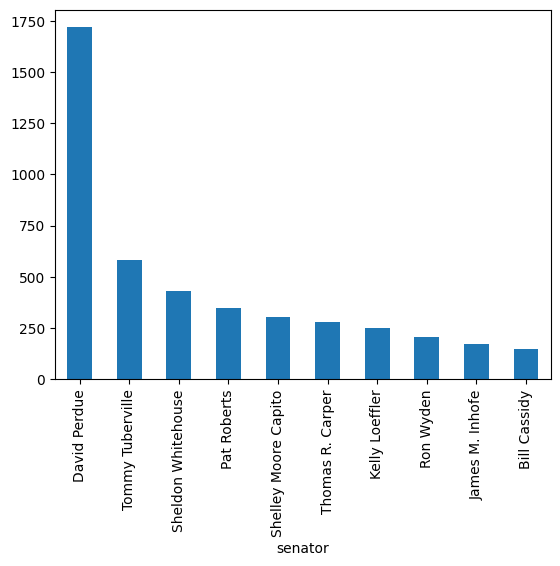

In [12]:
#find and plot the top 10 most common crimes
Top_Senators = trades.senator.value_counts()[:10]

display(Top_Senators)

(Top_Senators.plot(kind='bar'))

party
Republican     4134
Democrat       1340
Independent      27
Name: count, dtype: int64

<Axes: xlabel='party'>

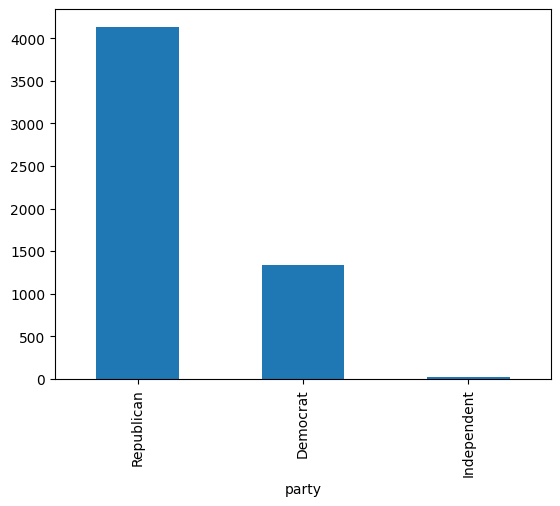

In [13]:
#find and plot the top 10 most common crimes
Party_Types = trades.party.value_counts()[:10]

display(Party_Types)

(Party_Types.plot(kind='bar'))

In [36]:
trades['transaction_date'].dt.month.value_counts()

transaction_date
4     852
3     649
2     581
1     528
8     458
12    409
11    394
6     389
9     339
10    331
7     300
5     271
Name: count, dtype: int64

In [15]:
#save cleaned up dataframe as trades_clean.csv for import into Tableau

#trades.to_csv("trades_clean.csv")